# Экзаменационное задание по курсу «Python для анализа данных»

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Задание 1: Работа с массивами NumPy
Цель: Проверить знание методов NumPy для анализа данных.

Задание:

Создайте массив случайных чисел (50 элементов) из диапазона [10, 100].

Найдите:
- Среднее арифметическое массива.
- Медиану.
- Стандартное отклонение.
- Создайте новый массив, где каждое число изначального массива делится на 3. Отфильтруйте числа, которые делятся без остатка.

Ожидаемый ответ:

- Вывод среднего, медианы, стандартного отклонения.
- Новый массив и его фильтр.

Балл: 6

In [14]:
array = np.random.randint(10, 101, size=50)
display(array)
# Среднее арифметическое
display(np.mean(array))
# Медиана
display(np.median(array))
# Стандартное отклонение
display(np.std(array))
# Массив, разделённый на 3 и отфильтрованный согласно заданию
display(array[array % 3 == 0] / 3)

array([ 12,  74,  45,  13,  26,  94,  79,  59,  63,  10,  15,  21,  43,
        24,  21,  14,  18, 100,  63,  74,  37,  64,  74,  26,  36,  88,
        24,  93,  56,  18,  87,  72,  28,  48,  70,  37,  93,  17,  46,
        38,  26,  42,  98,  84,  59,  10,  49,  96,  43,  82])

50.18

45.5

28.118812208199692

array([ 4., 15., 21.,  5.,  7.,  8.,  7.,  6., 21., 12.,  8., 31.,  6.,
       29., 24., 16., 31., 14., 28., 32.])

## Задание 2: Анализ данных с помощью Pandas
Цель: Проверить навыки анализа и обработки данных.

Данные: Используйте предоставленный CSV-файл ("sales_data_large.csv"), содержащий данные о продажах с полями:

- date (дата продаж),
- region (регион),
- product (продукт),
- sales (объем продаж).

Задание:

- Загрузите данные из файла.

Определите:
- Общее количество записей.
- Какие регионы и продукты присутствуют в данных.

Подсчитайте:
- Общие продажи по регионам.
- Средний объем продаж для каждого продукта.
- Постройте сводную таблицу, показывающую средние продажи по регионам и продуктам.

Ожидаемый ответ:

- Итоги анализа данных.
- Построенная сводная таблица.

Балл: 9



In [39]:
# Считываем данные
df = pd.read_csv("data/sales_data_large.csv")
# Определяем общее количество записей
display(len(df))
# Выводим уникальные регионы
display(df.region.unique())
# Общие продажи по регионам
display(df[["region", "sales"]].groupby("region").sum())
# Средний объём продаж для каждого продукета
display(df[["product", "sales"]].groupby("product").mean())
# Сводная таблица
display(df.pivot_table(values="sales", index="product", columns="region", aggfunc="mean"))

500

array(['West', 'South', 'East', 'North'], dtype=object)

,sales
region,
East,29244
North,39605
South,33023
West,35171


,sales
product,
Widget A,275.424242
Widget B,268.331361
Widget C,278.614458


region,East,North,South,West
product,,,,
Widget A,291.464286,289.145833,277.380952,250.106383
Widget B,263.116279,238.477273,282.833333,291.550000
Widget C,271.361111,304.660000,263.722222,267.136364


## Задание 3: Очистка данных и визуализация
Цель: Проверить умение находить и исправлять ошибки в данных, а также визуализировать их.

Данные: Используйте предоставленный CSV-файл ("sales_cleaning_large.csv"), содержащий данные о продажах с возможными пропущенными и некорректными значениями. 

Поля:

- date (дата продаж),
- sales (объем продаж),
- region (регион).

Задание:

1. Найдите и устраните ошибки в данных:
2. Заполните пропущенные даты.
3. Удалите отрицательные значения в столбце sales или замените их на медиану столбца.
4. Заполните пропущенные значения в sales средним значением.
5. Постройте график продаж по датам. Убедитесь, что даты упорядочены.

Ожидаемый ответ:

- Обработанный DataFrame.
- Построенный график.

Балл: 10

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 1 to 195
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    107 non-null    object 
 1   sales   101 non-null    float64
 2   region  111 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 1 to 195
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    107 non-null    object 
 1   sales   101 non-null    float64
 2   region  111 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 1 to 195
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    111 non-null    object 
 1   sales   111 non-null    float64
 2   region  111 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


None

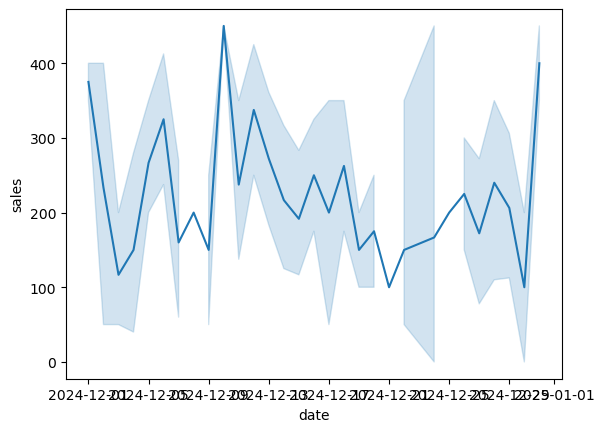

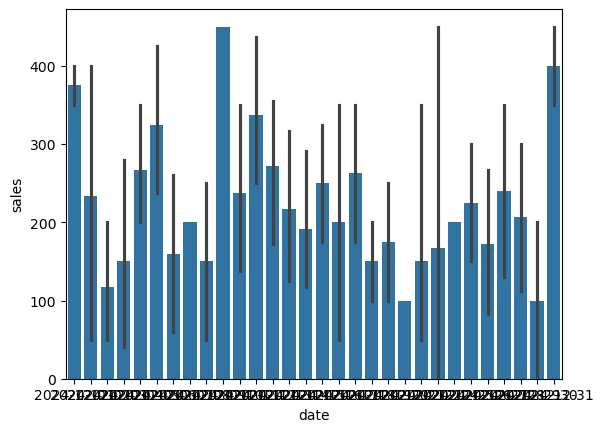

In [94]:
# Считываем данные
df = pd.read_csv("data/sales_cleaning_large.csv")
# Удлаяем строки, содержащие отрицательные продажи
df = df.drop(df[df['sales'] < 0].index)
display(df.info())
# Определяем пустые данные
display(df.info())
# Заполняем данные
df.date = df.date.fillna(np.random.choice(df.date.dropna().unique()))
df.sales = df.sales.fillna(df.sales.median())
display(df.info())
df.date = pd.to_datetime(df.date)
# Графики продаж по датам
fig_1 = sns.lineplot(
    df[["date", "sales"]],
    x=df["date"],
    y=df["sales"]
    )
plt.show()
fig_2 = sns.barplot(
    df[["date", "sales"]],
    x=df["date"],
    y=df["sales"])
plt.show()

## Задание 4: Получение данных из API
Цель: Проверить способность работать с веб-данными.

Задание:

1. Используйте открытое API (например, https://jsonplaceholder.typicode.com/users).
2. Загрузите данные и создайте DataFrame с полями: id, name, email, company_name.
3. Выведите таблицу с пользователями, работающими в компаниях, название которых содержит слово "Group".

Ожидаемый ответ:

- DataFrame с результатами фильтрации.
Балл: 6



$$
\begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix}
\times
\begin{pmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{pmatrix}
=
\begin{pmatrix}
a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\
a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22}
\end{pmatrix}
$$

In [100]:
import requests
# Загружаем данные
url = "https://jsonplaceholder.typicode.com/users"
json_data = requests.get(url).json()
# Выбираем только необходимые поля из json'a
df_data = [{"id": user["id"], "name": user["name"], "email": user["email"], "company_name": user["company"]["name"]} for user in json_data]
# Загружаем в dataframe
df = pd.DataFrame(df_data)
# Вывод
display(df[df["company_name"].str.contains("Group")])

,id,name,email,company_name
6,7,Kurtis Weissnat,Telly.Hoeger@billy.biz,Johns Group
7,8,Nicholas Runolfsdottir V,Sherwood@rosamond.me,Abernathy Group
